In [2]:
import os
from functions import *
import networkx as nx
import pickle

In [2]:
path = 'graphs/dg_creators.pickle'

with open(path, 'rb') as f:
    DG_creators = pickle.load(f)

print(f"Loaded graph: {DG_creators.number_of_nodes()} nodes, {DG_creators.number_of_edges()} edges")


Loaded graph: 153 nodes, 506 edges


Visualizing creator network: 153 nodes, 506 edges
Episodes: 108 (GoT: 3, HotD: 8, AKotSK: 7)
Writers: 18
Directors: 27


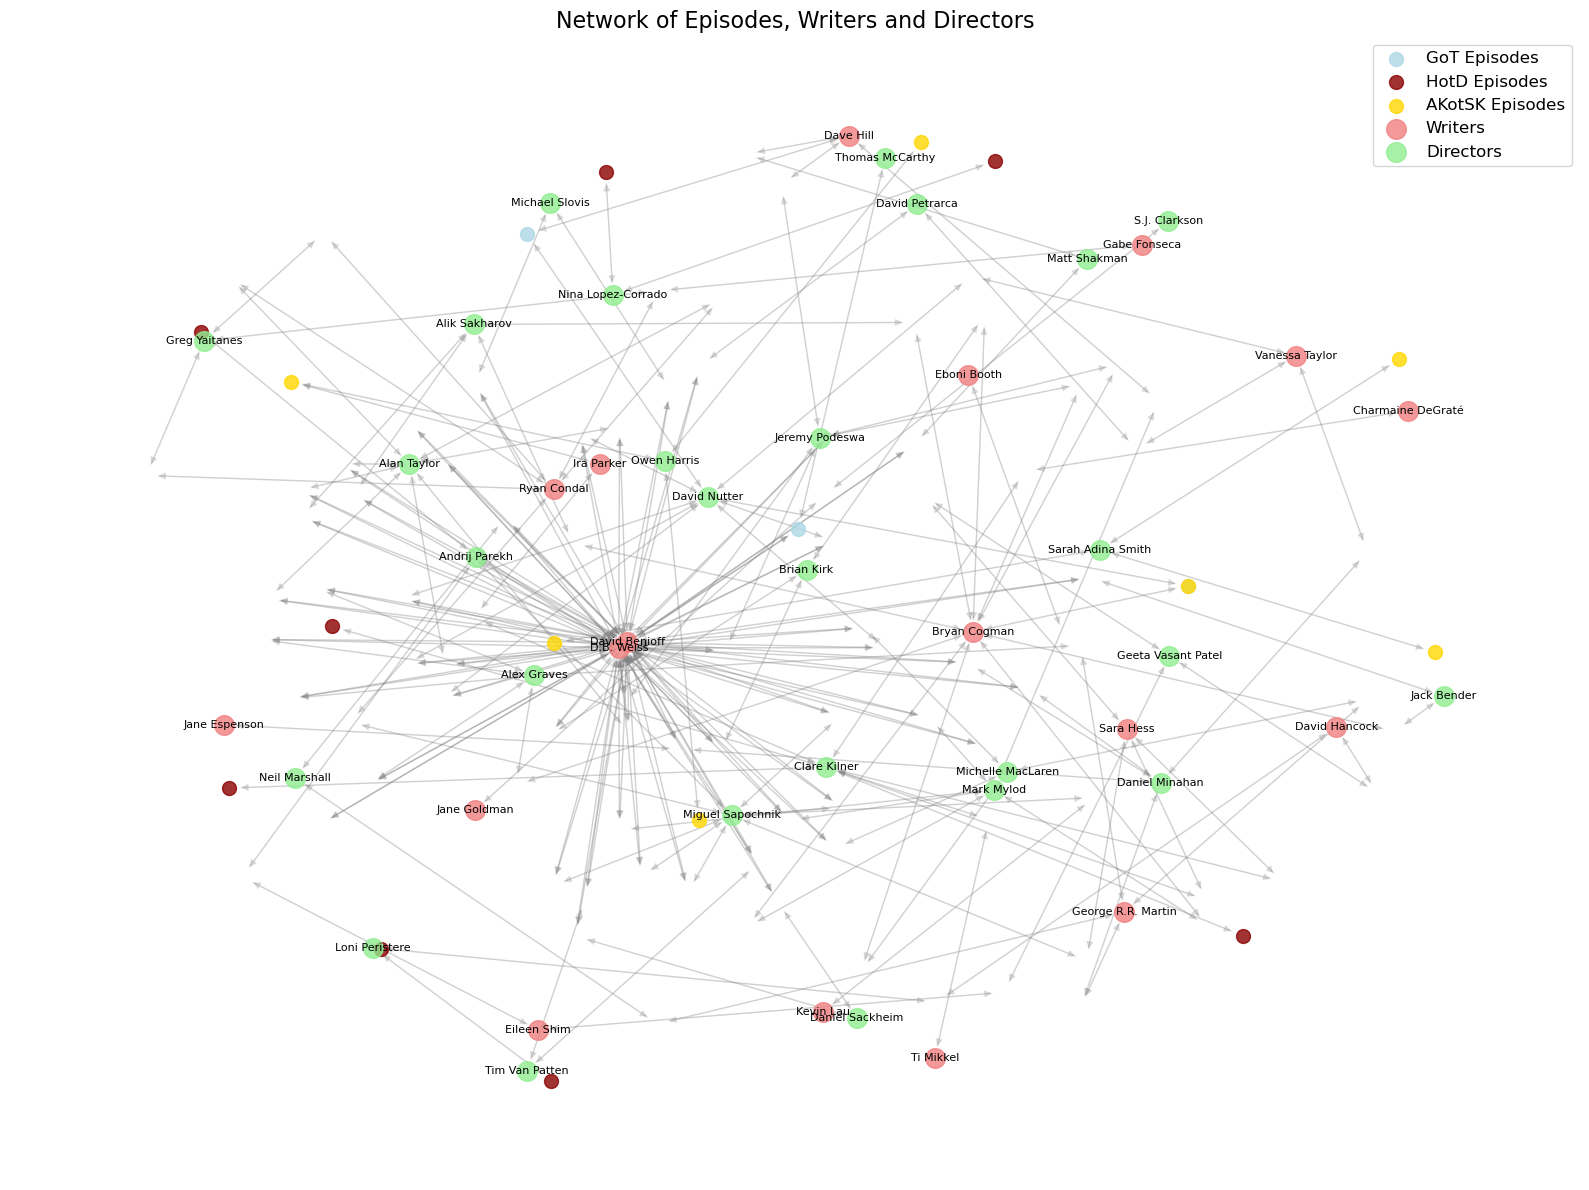

In [5]:
# Visualize the creator network with colored node types
import matplotlib.pyplot as plt

if DG_creators.number_of_nodes() > 0:
    print(f"Visualizing creator network: {DG_creators.number_of_nodes()} nodes, {DG_creators.number_of_edges()} edges")
    
    # Separate nodes by type
    episodes = [n for n in DG_creators.nodes() if DG_creators.nodes[n].get('type') == 'episode']
    writers = [n for n in DG_creators.nodes() if DG_creators.nodes[n].get('type') == 'writer']
    directors = [n for n in DG_creators.nodes() if DG_creators.nodes[n].get('type') == 'director']
    
    # Further separate episodes by series
    got_episodes = [ep for ep in episodes if 'Game of Thrones' in ep or 'Season' in ep and 'Knight' not in ep and 'House' not in ep]
    hotd_episodes = [ep for ep in episodes if 'House of the Dragon' in ep]
    akotsk_episodes = [ep for ep in episodes if 'Knight of the Seven Kingdoms' in ep]
    
    print(f"Episodes: {len(episodes)} (GoT: {len(got_episodes)}, HotD: {len(hotd_episodes)}, AKotSK: {len(akotsk_episodes)})")
    print(f"Writers: {len(writers)}")
    print(f"Directors: {len(directors)}")
    
    # Calculate layout
    pos = nx.spring_layout(DG_creators, k=0.5, iterations=50, seed=42)
    
    # Node sizes by degree
    degrees = dict(DG_creators.degree())
    
    # Draw
    fig, ax = plt.subplots(figsize=(16, 12))
    
    # Draw edges with reduced opacity
    nx.draw_networkx_edges(DG_creators, pos, alpha=0.2, edge_color='gray', ax=ax)
    
    # Draw nodes by type with different colors
    nx.draw_networkx_nodes(DG_creators, pos, nodelist=got_episodes,
                          node_color='lightblue', node_size=100,
                          label='GoT Episodes', alpha=0.8, ax=ax)
    nx.draw_networkx_nodes(DG_creators, pos, nodelist=hotd_episodes,
                          node_color='darkred', node_size=100,
                          label='HotD Episodes', alpha=0.8, ax=ax)
    nx.draw_networkx_nodes(DG_creators, pos, nodelist=akotsk_episodes,
                          node_color='gold', node_size=100,
                          label='AKotSK Episodes', alpha=0.8, ax=ax)
    nx.draw_networkx_nodes(DG_creators, pos, nodelist=writers,
                          node_color='lightcoral', node_size=200,
                          label='Writers', alpha=0.8, ax=ax)
    nx.draw_networkx_nodes(DG_creators, pos, nodelist=directors,
                          node_color='lightgreen', node_size=200,
                          label='Directors', alpha=0.8, ax=ax)
    
    # Label writers and directors only (too many episodes to label)
    labels = {n: n for n in writers + directors}
    nx.draw_networkx_labels(DG_creators, pos, labels, font_size=8, ax=ax)
    
    ax.set_title('Network of Episodes, Writers and Directors', fontsize=16)
    ax.legend(loc='upper right', fontsize=12)
    ax.axis('off')
    plt.tight_layout()
    plt.show()
else:
    print("No data to visualize")


In [3]:
DG_creators.nodes()

NodeView(('The Old Gods and the New', 'Vanessa Taylor', 'David Nutter', 'House of the Dragon_ Season 3, Episode 8', 'Andrij Parekh', 'Baelor', 'David Benioff', 'D.B. Weiss', 'Alan Taylor', 'Blackwater', 'George R.R. Martin', 'Neil Marshall', 'House of the Dragon_ Season 3, Episode 5', 'Nina Lopez-Corrado', 'Battle of the Bastards (episode)', 'Miguel Sapochnik', 'Hardhome (episode)', 'Driftmark (episode)', 'Kevin Lau', 'The Dragon and the Wolf', 'Jeremy Podeswa', 'The Climb', 'Alik Sakharov', 'Regent (episode)', 'Ti Mikkel', 'Clare Kilner', 'Sons of the Harpy (episode)', 'Dave Hill', 'Mark Mylod', 'Two Swords', 'The Laws of Gods and Men', 'Bryan Cogman', 'The Rains of Castamere (episode)', 'Fire and Blood', 'The Black Queen', 'Ryan Condal', 'Greg Yaitanes', 'The Night Lands', 'The Broken Man', 'Lord Snow', 'Brian Kirk', 'The Wolf and the Lion', 'A Knight of the Seven Kingdoms_ Season 1, Episode 5', 'Sarah Adina Smith', 'A Knight of the Seven Kingdoms_ Season 1, Episode 4', 'The Heirs of

In [4]:
DG_creators.nodes['David Benioff'].get('type')

'writer'

In [6]:
path = 'graphs/dg_characters.pickle'

with open(path, 'rb') as f:
    DG_characters = pickle.load(f)

print(f"Loaded graph: {DG_characters.number_of_nodes()} nodes, {DG_characters.number_of_edges()} edges")


Loaded graph: 894 nodes, 8034 edges


In [7]:
for node in list(DG_characters.nodes()):
    if 'sam' in node.lower():
        print(node)

Samwell Hunter
Samwell Tarly
Sam#In the books
Samwell Stone
Sam
Samwell


In [15]:
path = 'graphs/dg_sections_v2.pickle'

with open(path, 'rb') as f:
    DG_sections = pickle.load(f)

print(f"Loaded graph: {DG_sections.number_of_nodes()} nodes, {DG_sections.number_of_edges()} edges")


Loaded graph: 5672 nodes, 198768 edges


In [16]:
path = 'graphs/dg_characters.pickle'

with open(path, 'rb') as f:
    DG_characters = pickle.load(f)

print(f"Loaded graph: {DG_characters.number_of_nodes()} nodes, {DG_characters.number_of_edges()} edges")


Loaded graph: 847 nodes, 10601 edges


In [17]:
chars = list(DG_characters.nodes())

for char in chars:
    for cat in DG_sections.nodes[char].:
        if 'Individuals appearing in Game of Thrones' in cat:
            print(char)

SyntaxError: invalid syntax (2474444276.py, line 4)

In [31]:
# Identify character nodes using category attributes
character_categories = set([
    'Individuals from Game of Thrones',
    # 'Individuals from House of the Dragon',
    # 'Individuals from A Knight of the Seven Kingdoms',
    # 'Individuals appearing in Game of Thrones',
    # 'Individuals appearing in House of the Dragon',
    # 'Individuals appearing in A Knight of the Seven Kingdoms',
])

# Find all character nodes based on their category attributes
character_nodes_from = set()
for node in DG_sections.nodes():
    node_cats = DG_sections.nodes[node].get('categories', [])
    
    # Check if node has any character categories
    if any(cat in character_categories for cat in node_cats):
        character_nodes_from.add(node)

In [32]:
# Identify character nodes using category attributes
character_categories = set([
    # 'Individuals from Game of Thrones',
    # 'Individuals from House of the Dragon',
    # 'Individuals from A Knight of the Seven Kingdoms',
    'Individuals appearing in Game of Thrones',
    # 'Individuals appearing in House of the Dragon',
    # 'Individuals appearing in A Knight of the Seven Kingdoms',
])

# Find all character nodes based on their category attributes
character_nodes_app = set()
for node in DG_sections.nodes():
    node_cats = DG_sections.nodes[node].get('categories', [])
    
    # Check if node has any character categories
    if any(cat in character_categories for cat in node_cats):
        character_nodes_app.add(node)

In [30]:
DG_characters.in_edges('Donal Royce')

InEdgeDataView([('Diana Royce', 'Donal Royce'), ('Wayrick Royce', 'Donal Royce'), ('Donal Royce (son of Donal)', 'Donal Royce'), ('Robar Royce (lord)', 'Donal Royce'), ('Maynard Royce', 'Donal Royce'), ('Priscilla Royce', 'Donal Royce')])

In [ ]:
# Visualize Donal Royce and all nodes within 3 degrees
import matplotlib.pyplot as plt

# Get all nodes within 3 degrees from Donal Royce
ego_graph = nx.ego_graph(DG_characters, 'Donal Royce', radius=3)

print(f"Donal Royce's 3-degree network:")
print(f"  Nodes: {ego_graph.number_of_nodes()}")
print(f"  Edges: {ego_graph.number_of_edges()}")

# Calculate layout
pos = nx.spring_layout(ego_graph, k=1, iterations=50, seed=42)

# Get distance from Donal Royce for each node
distances = nx.single_source_shortest_path_length(ego_graph, 'Donal Royce', cutoff=3)

# Color nodes by distance
color_map = {0: 'red', 1: 'orange', 2: 'yellow', 3: 'lightblue'}
node_colors = [color_map[distances.get(node, 3)] for node in ego_graph.nodes()]

# Size nodes by degree in the subgraph
degrees = dict(ego_graph.degree())
node_sizes = [degrees[node] * 50 + 100 for node in ego_graph.nodes()]

# Draw the graph
fig, ax = plt.subplots(figsize=(16, 12))

# Draw edges
nx.draw_networkx_edges(ego_graph, pos, alpha=0.3, edge_color='gray', 
                       arrows=True, arrowsize=10, ax=ax)

# Draw nodes
nx.draw_networkx_nodes(ego_graph, pos, node_color=node_colors, 
                      node_size=node_sizes, alpha=0.8, ax=ax)

# Draw labels (only for nodes with degree > 2 to avoid clutter)
labels = {n: n for n in ego_graph.nodes() if degrees[n] > 2 or n == 'Donal Royce'}
nx.draw_networkx_labels(ego_graph, pos, labels, font_size=8, ax=ax)

# Create legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='red', label='Donal Royce (0 degrees)'),
    Patch(facecolor='orange', label='1 degree away'),
    Patch(facecolor='yellow', label='2 degrees away'),
    Patch(facecolor='lightblue', label='3 degrees away')
]
ax.legend(handles=legend_elements, loc='upper right', fontsize=10)

ax.set_title("Donal Royce's 3-Degree Network", fontsize=16, fontweight='bold')
ax.axis('off')
plt.tight_layout()
plt.show()

# Show statistics by degree
print("\nNodes by distance from Donal Royce:")
for dist in range(4):
    nodes_at_dist = [n for n, d in distances.items() if d == dist]
    print(f"  {dist} degree(s): {len(nodes_at_dist)} nodes")
    if dist == 0:
        print(f"    {nodes_at_dist}")

In [34]:
for char in character_nodes_from:
    if char in character_nodes_app:
        print(char)

In [26]:
character_nodes

{'Alys Arryn',
 'Andar Royce',
 'Argalia Baratheon',
 'Bendleton',
 'Brammax Egen',
 'Brune Baratheon',
 'Bryte Baratheon',
 'Catherine Hornwood',
 'Daneala Royce',
 'Dareon Hunter',
 'Darlessa Marbrand',
 'Diana Royce',
 'Domeric Bolton',
 'Donal Royce',
 'Donal Royce (son of Donal)',
 'Dorgas Hunter',
 'Edwina Royce',
 'Elena Egen',
 'Garlan Tyrell',
 'Genna Lannister',
 'Gilwood Hunter',
 'Gude Baratheon',
 'Hullen',
 'Janei Lannister',
 'Jasper Arryn',
 'Jeyne Marbrand',
 'Jon Baratheon',
 'Junia Royce',
 'Junia Royce (daughter of Donal)',
 'Kathe',
 'Keohane',
 'Last hero',
 'Lex Baratheon',
 'Lionel Hunter',
 'Lorax Baratheon',
 'Luna Royce',
 'Mace Baratheon',
 'Martyn Baratheon',
 'Mavis Royce',
 'Mavis Royce (daughter of Donal)',
 'Maxim Royce',
 'Maynard Hunter',
 'Maynard Royce',
 'Millicent Hunter',
 'Miriam Baratheon',
 'Orys Baratheon (son of William)',
 'Paxter Royce',
 'Phillippa Royce',
 'Priscilla Royce',
 'Pruea Royce',
 'Robar Royce (lord)',
 'Ronnel Arryn (son of J